## Code submission

If you would like to use Jupyter (perhaps the easiest way), just submit the notebook file to bCourses. Name it lastname_firstname_(Homework#).ipynb. For example, obama_barack_1.ipynb. This applies to the case if you **only** have a notebook file.

If you use MATLAB or Julia/Python (not the notebook), **or** if you have multiple files, name your programs as p(Homework#)_(Problem#).m. For instance, for homework 1, problem 2, name it as p1_2.m (or p1_2.jl,p1_2.py). Then **zip everything** into a single file lastname_firstname_(Homework#).zip, and submit the zip file to bCourses. For example, obama_barack_1.zip.

For proof-related problems, type your solution using **LaTeX (no other format is accepted)**. You do not need to write down every step of the derivation, but make sure the logic is clear and understandable.

For implementation based problems, the problem description may not include all the information for the answer to be uniquely defined. For instance, your answer might depend on the choice of the mesh size. This is OK.

## Problem 1

Consider $u'(t)=f(u(t)),u(0)=u_0$, and $f:\mathbb{R}^{d}\to \mathbb{R}$ 
is Lipschitz continuous with a
Lipschitz constant $L$. Let $\max \Vert u''(t)\Vert$ be bounded by a constant $M$ for $0\le t\le T$. Prove that the backward Euler method converges as the step size $h\to 0$.

**Problem 1**

Taylor expanding around $t_n$ to derive Backwards Euler

$ \begin{align}
u(t_{n} - h) = u(t_n) + u'(t_n)(-h) + \frac{u''(\xi)}{2!}h^2 && \text{for $\xi\in[t_{n+1}, t_n]$ and  $h := t_{n+1} - t_n$} \\
\end{align} $

Rearranging and setting $t_n - h [= t_{n-1}] = t_n \text{ and } t_n = t_{n+1} $

$
\begin{align}
u(t_{n+1})  = u(t_n) + u'(t_{n+1})h + \frac{u''(\xi)}{2!}h^2 && \text{Backwards Euler} \\
\frac{u(t_{n+1}) - u(t_{n})}{h} - u'(t_{n+1})  = \frac{u''(\xi)}{2}h
\end{align}
$

Noting $\lim_{h \to 0} \text{ is equivalent to } lim_{t_{n+1} \to t_n}$

$
\begin{align}
lim_{t_{n+1} \to t_n} \left(\frac{u(t_{n+1}) - u(t_{n})}{t_{n+1} - t_n} - u'(t_{n+1}) \right) = lim_{t_{n+1} \to t_n}\frac{u''(\xi)}{2}(t_{n+1}-t_n) && (1)
\end{align}
$

We want to show $\left\| lim_{t_{n+1} \to t_n} \left(\frac{u(t_{n+1}) - u(t_{n})}{t_{n+1} - t_n}  \right) - u'(t_{n+1}) \right\| = 0 $. This is equivalent to Backwards Euler converging as $h \to 0$


Taking the norm of the limit of the right hand side of $(1)$

$ = \left\| lim_{t_{n+1} \to t_n}\frac{u''(\xi)}{2}(t_{n+1}-t_n) \right\|$

$
\begin{align}
\leq \| \frac{M}{2}\lim_{t_{n+1} \to t_n} (t_{n+1} - t_n) \| && && && \text{Since $\| u''(\xi) |\ \leq M$} \\
\end{align}
$

$ = 0$

Therefore $\left\| lim_{t_{n+1} \to t_n} \left(\frac{u(t_{n+1}) - u(t_{n})}{t_{n+1} - t_n}  \right) - u'(t_{n+1}) \right\| = \left| lim_{t_{n+1} \to t_n} \left(\frac{u(t_{n+1}) - u(t_{n})}{t_{n+1} - t_n}  \right) - u'(t_{n+1}) \right| = 0 $

and Backward Eulers Method converges as $h \to 0$ when $u''$ is bounded ($u''$ implies that $f$ is $\text{lipschitz}$)

## Problem 2

Consider the initial value problem
$$
\begin{split}
u'_{1} &= u_{1},\\
u'_{2} &= u_{1} - u_{2},\\
\end{split}
$$
with initial condition $(u_{1}(0),u_{2}(0))=(1,1)$. 

1. Find a way to solve the problem above analytically, and write down the answer of u(T=2.0).

2. Solve the problem numerically using the trapezoidal rule. Verify that the solution agrees with the exact solution at time $T=2.0$. Use a number of step sizes $h=2^{-i},i=5,\ldots,10.$ Plot the error $e=\Vert u(1)-u^*(1)\Vert_2$ v.s. step size $h$ in a loglog plot, and estimate the convergence rate for each scheme.

**Note**: the routine for computing the error, plotting and computing the slope is provided. 

**Problem 2.1**

let $\vec{u} = \begin{pmatrix} u_1 \\ u_2 \end{pmatrix} \text{, }
     \vec{u}' = \begin{pmatrix} u_1' \\ u_2' \end{pmatrix} \text{, }
     A = \begin{pmatrix} 1 & 0 \\ 1 & -1 \end{pmatrix} $

then $\vec{u}' = A\vec{u}$ is the system we want to solve

$$
\begin{align}
\vec{u}' & = A\vec{u} \\
\vec{u}' & = QDQ^{-1}\vec{u} && && && \text{ diagonalizing A} \\
Q^{-1}\vec{u}' & = DQ^{-1}\vec{u} \\
\vec{v}'  & = D\vec{v} && && && \text{ letting  $ v = Q^{-1}\vec{u} $  } \\
\end{align}
$$

Then we have the system $ \begin{pmatrix} v_1' \\ v_2' \end{pmatrix} = 
                                            \begin{pmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{pmatrix} 
                                                \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} $
and then $ \vec{u} = Q\vec{v} $ will solve the original system.

$
\newcommand{\Q}{\begin{pmatrix} 0 & 2 \\ 1 & 1 \end{pmatrix}} 
\newcommand{\D}{\begin{pmatrix} -1 & 0 \\ 0  & 1 \end{pmatrix}}
$
Diagonalizing $A$ yields $Q = \Q $ and  $D = \D$

$$
\begin{align}
v_1' = \lambda_1v_1 = -v_1 \implies v_1 = C_1e^{-t} \\
v_2' = \lambda_2v_2 = v_2 \implies v_2 = C_2e^{t} \\
\end{align}
$$

$$
\begin{align}
\vec{u} & = \Q \vec{v} \\
& = \begin{pmatrix} 2C_2e^{t} \\ C_1e^{-t} + C_2e^{t} \end{pmatrix}
\end{align}
$$

initial conditions $(u_{1}(0),u_{2}(0))=(1,1)$

$
\begin{pmatrix} 2C_2 \\ C_1 + C_2 \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
\implies C_2 = \frac{1}{2} \text{ and } C_2 = \frac{1}{2}
$

finally,

$\boxed{ \vec{u} = \begin{pmatrix} e^t \\ \frac{1}{2}\left( e^{-t} + e^t \right) \end{pmatrix} }  $

In [9]:
using LinearAlgebra
A = [1 0; 1 -1]
D = Diagonal(eigvals(A))
Q = eigvecs(A)
Q⁻¹ = inv(Q)
# Q*D*Q⁻¹
# Q
# D
# ...
u₀ = [1 , 1]
u₀ = u₀ + [u₀[1], u₀[1] - u₀[2]]
print(u₀)

[2, 1]

implicit trapezoidal method $ w_{j+1} = w_j + \frac{h}{2} \left( f(t_{j+1}, w_{j+1}) + f(t_j, w_j) \right)$

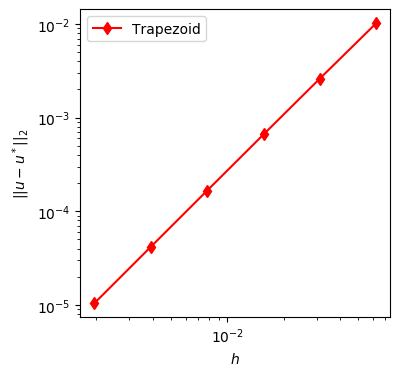

1.9866440740311346

In [10]:
using LinearAlgebra
using PyPlot

u⃗⁽¹⁾(t) = [exp(t), 1/2*(-exp(-t) + exp(t))] # = [u1, u1 - u2]

function Trapezoid(N,T,u0)
    # Fill code here
    h = T/N
    u = u0
    
    for n = 1 : N
        uₙ⁽¹⁾ = A*u
        uₙ₊₁⁽¹⁾ = A*(u + h*uₙ⁽¹⁾) # approximate f(tₙ₊₁, uₙ₊₁) by one step of eulers
        u = u + h/2*(uₙ⁽¹⁾ + uₙ₊₁⁽¹⁾)
#         u = u + h/2 * (A*u + A*(u + h*A*u)) 
    end
    
#     for n = 1 : N
#         u = u + h/2*(A*u + u⃗⁽¹⁾(n*h)) # this requires knowing the derivative of the solution
#     end
    
    
    
    return u
end

u0 = [1.0,1.0]
T = 2.0
# You need to compute uexact at T=2.0
u⃗(t) = [exp(t) ; 1/2*(exp(-t) + exp(t))]
uexact = u⃗(T)

# Plotting routine provided below
NList = 2 .^(5:10)
errTrapeList = zeros(size(NList))
for i = 1 : length(NList)
    N = NList[i]
    utrape = Trapezoid(N,T,u0)
    errTrapeList[i] = norm(utrape-uexact)
end

figure(1,figsize=(4,4))
loglog(T./NList, errTrapeList, "r-d", label="Trapezoid")
xlabel(L"h")
ylabel(L"||u-u^*||_2")
legend()

slopeTrape = -(log(errTrapeList[end])-log(errTrapeList[1])) / 
(log(NList[end]) - log(NList[1]))

# println("Slope for Trapezoid = ", slopeTrape )

## Problem 3

Consider a simple pendulum of length $l$, forming an angle $\theta(t)$ with the
vertical axis. The equation of motion for the pendulum is given by

$$\theta''(t)+\frac{g}{l} \sin(\theta(t))=0,$$

where $g$ is the gravitational constant, with given initial conditions

$$\theta(0)=\theta_0,\quad \theta'(0)=\omega_0.$$

1. Rewrite the equation as a system of first order equations in $u(t)=(\theta(t),\omega(t))$. Fill the `func` function below. 

2. Write a forward Euler method. Use a sufficiently small time step, and plot the solution of $\theta(t)$ with $g=l=1$ and initial condition $(\theta(0),\omega(0))=(2.5,0.0)$ till $T=25$. Since no exact solution is available, measure the convergence rate by means of the solution at T=25 obtained from three time steps h, h/2, and h/4.

**Problem 3.1** 
$
\newcommand{\ul}{\begin{pmatrix}  \omega \\ \theta \end{pmatrix}}
\newcommand{\ur}{\begin{pmatrix} -\frac{g}{l}sin(\theta(t)) \\ \omega \end{pmatrix}}
$
$$
\theta''(t) = -\frac{g}{l}sin(\theta(t)) \\
\text{let } \omega = \theta'(t) \\
\text{then } \vec{u}' = \ul' = \ur
$$

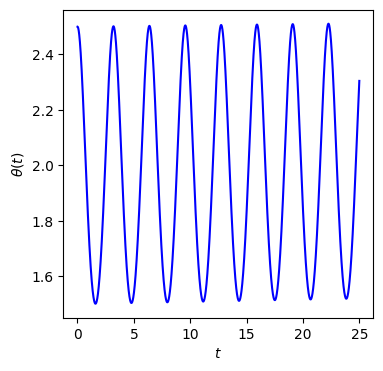

PyObject Text(26.0, 0.5, '$\\theta(t)$')

In [11]:
function func(u,g,l) # calculates derivative of u⃗
    # fill here for evaluating f(u)
    v = [0.0, 0.0]
    v[1] = -g/l*sin(u[2])
    v[2] = u[1]
    return v
end

function ForwardEulerFull(N,T,u0,g,l)
    # Fill code here. 
    # The output should be the full history of the solution
    # i.e. the output u should be of size 2×(N+1)
    # This is of course memory intensive and is not the 
    # commonly used approach
    u = zeros(2,N+1)
    u[:, 1] = u0
    h = T/N

    for i = 1 : N
        u[:, i + 1] = u[:, i] + h*func(u[:, i], g, l)
    end
    return u
end

# This should plot out the solution
g=1.0
l=1.0
T=25.0
N=10000
u0=[2.5,0.0]

uEulerFull = ForwardEulerFull(N,T,u0,g,l)
tList = collect(0:N)*(T/N)

using PyPlot
figure(1,figsize=(4,4))
plot(tList,vec(uEulerFull[1,:]),"b-")
xlabel(L"t")
ylabel(L"\theta(t)")

In [12]:
function ForwardEuler(N,T,u0,g,l)
    # Fill code here. 
    # The output contains only the final solution u(T)
    u = u0
    h = T/N

    for i = 1 : N
        u = u + h*func(u, g, l)
    end
    return u
end

g=1.0
l=1.0
T=25.0
N=10000
u0=[2.5,0.0]

# Estimate the order of convergence
uₕ = ForwardEuler(N, T, u0, g, l)
uₕ₂ = ForwardEuler(N*2, T, u0, g, l)
uₕ₄ = ForwardEuler(N*4, T, u0, g, l)
xᵖ = (uₕ[2] - uₕ₂[2])/(uₕ₂[2] - uₕ₄[2]) # x = 2, p = order of convergence 
p = log(xᵖ)/log(2)

1.0159023649367134

## Problem 4

1. Repeat Problem 3.2 using the trapezoidal rule. Modify your implementation in Problem 2 if needed.

2. Repeat Problem 3.2 using the Adams-Bashforth 3 (AB3) scheme. Obtain the first two steps using forward Euler and trapezoidal rule, respectively. Observe the difference in terms of the convergence rate.



In [13]:
# Need to solve the nonlinear equation in trapezoidal rule.
function Trapezoid(N,T,u0,g,l)
    # Fill code here. 
    h = T/N
    u = u0
    
    for i = 1 : N
        uₙ⁽¹⁾ = func(u, g, l)
        uₙ₊₁ = u + h*uₙ⁽¹⁾
        uₙ₊₁⁽¹⁾ = func(uₙ₊₁, g, l)
        u = u + h/2*(uₙ⁽¹⁾ + uₙ₊₁⁽¹⁾)
    end
    # The output contains only the final solution u(T)
    return u
end

# Estimate the order of convergence
uₕ = Trapezoid(N, T, u0, g, l)
uₕ₂ = Trapezoid(N*2, T, u0, g, l)
uₕ₄ = Trapezoid(N*4, T, u0, g, l)
xᵖ = (uₕ[2] - uₕ₂[2])/(uₕ₂[2] - uₕ₄[2]) # x = 2, p = order of convergence 
p = log(xᵖ)/log(2)

2.0288877729690915

$
\frac{du}{dt} = f(t, u) \\
\int_{t_n}^{t_{n+1}} \frac{du}{dt} dt = \int_{t_n}^{t_{n+1}} f(t, u) dt \\
u_{n+1} - u_n = \int_{t_n}^{t_{n+1}} f(t, u) dt \\
$

approximate $f$ by $3$ interpolation points

$
f(t, u(t)) \approx \frac{ (t-t_1) (t-t_2) }{ (t_0-t_1) (t_0-t_2) } f(t_0) + \dots \\
\dots
$

Three step Adams Bashforth: $u_{n+1} = u_n + \frac{h}{12} \left[ 23 f(t_n, u_n) - 16 f(t_{n-1}, u_{n-1}) + 5 f(t_{n-2}, u_{n-2}) \right]$

In [14]:
# Need some method to compute u1,u2                                                                       

function AB3(N,T,u0,g,l)
    h = T/N
    # first order method
#     u1 = u0 + h*func(u0, g, l)
#     u2 = u1 + h*func(u1, g, l)
    # second order method
    u1 = Trapezoid(1, T/N, u0, g, l)
    u2 = Trapezoid(1, T/N, u1, g, l)
    # need a higher order method?
    
    # Fill code here. 
    uₙ₊₁ = 0
    uₙ = u2
    uₙ₋₁ = u1
    uₙ₋₂ = u0
    
    for n = 1 : N
#         uₙ⁽¹⁾ = func(u, g, l)
#         uₙ₊₁⁽¹⁾ = func(uₙ₊₁, g, l)
        uₙ₊₁ = uₙ + h/12*(23*func(uₙ, g, l) - 16*func(uₙ₋₁, g, l) + 5*func(uₙ₋₂, g, l))
    end
    # The output contains only the final solution u(T)
    u = uₙ₊₁
    return u
end

g=1.0
l=1.0
T=25.0
N=10000
u0=[2.5,0.0]

# Estimate the order of convergence
uₕ = AB3(N, T, u0, g, l)
uₕ₂ = AB3(N*2, T, u0, g, l)
uₕ₄ = AB3(N*4, T, u0, g, l)
xᵖ = (uₕ[2] - uₕ₂[2])/(uₕ₂[2] - uₕ₄[2]) # x = 2, p = order of convergence 
p = log(xᵖ)/log(2)

0.9999835632575426

The order of convergence using first a first order method and then a second order method to approximate the first two steps of the three step Adams-Bashforth (AB3) appear to yield the same result. Both seem to suggest AB3 is a first order method. I don't think this is right, but I can't see what I'm doing wrong. I thought I might need a higher order method for those first two steps, but the analysis we did in class suggested that wasn't the case.